<a href="https://colab.research.google.com/github/SandraMorkuniene/SandraMorkuniene/blob/main/MentalHealthinTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mental health in different work contexts


The aim of this work is to analyze Mental Health in the Tech Industry dataset and evaluate the openess to disclose mental health issues in different work contexts such as while talking with the potential employer (also compare to physical health issues); while talking with the coworkers or direct manager. Gender also will be taken into account while evaluating the openess to talk. Lastly, evaluate prevalence rate of having mental health disorder across the years and prevalence rate having at least two mental disorders in 2016.

</br>

##Objectives

*   Analyze openess to talk about mental health issues in the different work contexts:

1.   Be open about mental vs physical health with the potential employer.
2.   Be open about mental health issues with direct manager vs coworkers vs potential employer.
3.   Evaluate gender differences for these contexts while disclosing mental health issues.
*   Evaluate the prevalence rate of having mental disease across the years and prevalence of having more than one mental disease in 2016.

</br>

##Hypothesis formulated to address the first object

*   People will be willing to bring up physical health issue while talking with the potential employer  more often than mental health issue. Women or other gender will bring up mental health issue less often compare to men while talking with the potential employer.
</br>
*   The least people will be willing to talk about mental health issues with potential employer compare to coworkers and direct manager.For women this pattern will be even greater compare to men and the other.

</br>

##Main insights


*   The sample consisted of mainly male respondents those age ranged from 25 to 39 years old (~50% of the sample). 61% of respondents were located in the United States, ~15% of them from California state. The first three countries by the number of respondents were English speaking. 42% respondents worked in a small company (less than 100 employees), 68% indicated that their company was primarily tech industry company. Biased sample supposed the limitations for the generalization of the results.
</br>

*  44% of respondents indicated that had family history of mental illness, and 57% of respondents were looking for treatment from a mental health professional in the past. In 2016 - 2019 year surveys, 48% of respondents indicated that they had mental health disorder in the past, 42% of respondents had mental health disorder in the moment of filling questionnaire.
</br>

*   More than 3 times often respondents were willing to talk about physical health issues compare to mental health issues with the potential employer (only 5.4% respondents were open to talk about mental health issues compare to 21% for physical health issues). Females compare to male and the other gender were the least willing to talk about mental and physical health issues with the potential employer. The other gender didn't significantly differ from the males in openess to talk about mental or physical health issues.
</br>

*   It was expected that the least people will be willing to talk about mental issues with the potential employer compare to the coworkers and the direct manager. It was confirmed since only 5.4% of respondents were willing to share mental health issues compare to 21% of those willing to share mental health issues with coworkers and 34% of those willing to share it with the direct manager. Females compare to males and the other gender were less willing to talk about mental health issues with the direct manager and potential employer. Females compare to the other gender were less willing to talk about mental health issues with the coworkers. No differences between females and males for openess with coworkers identified.
</br>

*   Practical implications of the analysis done on the openess to talk about mental issues for the companies' HR could be to prepare and use direct managers as a channel to talk about mental health issues (since people mostly trusted them). Females were the most secretative about any kind of issues which could make them vulnerable in tech industry, knowing that HR could make females as  priority target audience for any kind of future intervention on mental health topic.
</br>

*   The prevalence rate of having mental health disorder for the period from 2016 to 2019 ranged in the interval from 40 to 50%. Only 2018 year's prevalence rate significantly differed from 2016 year's prevalence rate. In 2018 the prevalence rate of having mental health disorder was the highest (45.80%; 95% CI 41-50.6%).
</br>

*   The prevalence rate of having at least two mental health disorders in 2016 was 25.6% (CI 23.42%;27.93%).



#Data loading and preparation

In [1]:
import pandas as pd
import sqlite3
import numpy as np
from google.colab import files
from statsmodels.stats.proportion import proportion_confint, proportions_ztest
import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
pip install statsmodels

In [3]:
uploaded = files.upload()

Saving mental_health.sqlite to mental_health.sqlite


In [4]:
conn = sqlite3.connect('mental_health.sqlite')

# Get a list of all tables in the database
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

tables

,name
0,Answer
1,Question
2,Survey


In [5]:
df_survey = pd.read_sql("SELECT * FROM Survey;", conn)

df_survey

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [6]:
df_answer = pd.read_sql("SELECT * FROM Answer;", conn)

df_answer

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


In [7]:
df_question = pd.read_sql("SELECT * FROM Question;", conn)

df_question

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state ...",4
4,Are you self-employed?,5
...,...,...
100,Do you think that team members/co-workers woul...,114
101,"If yes, what condition(s) have you been diagno...",115
102,"If maybe, what condition(s) do you believe you...",116
103,Which of the following best describes your wor...,117


In [8]:
query="""
SELECT SurveyID,
COUNT(DISTINCT questionid) AS N_questions,
COUNT(DISTINCT UserID) AS N_respondents
FROM
(SELECT * FROM Answer) GROUP BY SurveyID;
"""

df_answer = pd.read_sql(
    query, conn)

df_answer

,SurveyID,N_questions,N_respondents
0,2014,26,1260
1,2016,60,1433
2,2017,76,756
3,2018,76,417
4,2019,76,352


We have 5 different surveys in a dataset which differs in the number of questions and the number of respondents participated.

In [9]:
query = """
WITH t1 AS (SELECT *,
CASE WHEN surveyID=2014 THEN 1 ELSE 0 END AS "2014_res",
CASE WHEN surveyID=2016 THEN 1 ELSE 0 END AS "2016_res",
CASE WHEN surveyID=2017 THEN 1 ELSE 0 END AS "2017_res",
CASE WHEN surveyID=2018 THEN 1 ELSE 0 END AS "2018_res",
CASE WHEN surveyID=2019 THEN 1 ELSE 0 END AS "2019_res"
FROM
(SELECT *
 FROM Answer a LEFT JOIN Question q ON a.QuestionID = q.questionid))

SELECT  QuestionID, questiontext,
SUM("2014_res") AS res_2014,
SUM("2016_res") AS res_2016,
SUM("2017_res") AS res_2017,
SUM("2018_res") AS res_2018,
SUM("2019_res") AS res_2019
 FROM t1
 GROUP BY QuestionID, questiontext
;
"""

df_answer = pd.read_sql(
    query, conn)

df_answer

,QuestionID,questiontext,res_2014,res_2016,res_2017,res_2018,res_2019
0,1,What is your age?,1260,1433,756,417,352
1,2,What is your gender?,1260,1433,756,417,352
2,3,What country do you live in?,1260,1433,756,417,352
3,4,"If you live in the United States, which state ...",1260,1433,756,417,352
4,5,Are you self-employed?,1260,1433,756,417,352
...,...,...,...,...,...,...,...
100,114,Do you think that team members/co-workers woul...,0,1433,0,0,0
101,115,"If yes, what condition(s) have you been diagno...",0,2072,0,0,0
102,116,"If maybe, what condition(s) do you believe you...",0,1793,0,0,0
103,117,Which of the following best describes your wor...,0,2692,0,0,0


As we see not every question appeared in all year surveys, and some questions were asking the same thing but in the different question formulation across the years (i.e. Q18: "Would you feel comfortable discussing a mental health issue with your coworkers?"(appeared in 2016-2019 surveys) vs Q99."Would you be willing to discuss a mental health issue with your coworkers?"(appeared in 2014 survey)).

In [10]:
query = """
SELECT QuestionID, Question,
COUNT(DISTINCT UserID) AS n_answered,
COUNT(DISTINCT Answer) AS different_answers
FROM
(SELECT a.QuestionID, questiontext AS Question, UserID, AnswerText	AS Answer
FROM Answer a
INNER JOIN Question q ON a.QuestionID = q.questionid
)
GROUP BY QuestionID, Question;
"""

df_answer = pd.read_sql(query, conn)

df_answer

,QuestionID,Question,n_answered,different_answers
0,1,What is your age?,4218,65
1,2,What is your gender?,4218,101
2,3,What country do you live in?,4218,81
3,4,"If you live in the United States, which state ...",4218,51
4,5,Are you self-employed?,4218,3
...,...,...,...,...
100,114,Do you think that team members/co-workers woul...,1433,5
101,115,"If yes, what condition(s) have you been diagno...",1433,34
102,116,"If maybe, what condition(s) do you believe you...",1433,24
103,117,Which of the following best describes your wor...,1433,12


Some of the surveys questions were open ended, some had response options to be chosen from. These response options could also differ across the years.
</br>
We will also check whether samples of different year surveys are independant by identifying whether the same userIDs appeared in the surveys across the years: if so, we will do additional check on demographic information. If not, we will assume that samples across the years are independant.

In [11]:
query = """
SELECT SurveyID,
MIN(UserID) AS start_userID,
MAX(UserID) AS end_userID
FROM
(SELECT a.QuestionID, SurveyID,	UserID
 FROM Answer a
 WHERE a.QuestionID IN (1, 2, 3, 4))
GROUP BY SurveyID
;
"""

df_answer = pd.read_sql(
    query, conn)

df_answer

,SurveyID,start_userID,end_userID
0,2014,1,1260
1,2016,1261,2693
2,2017,2694,3449
3,2018,3450,3866
4,2019,3867,4218


We see that the same userIDs have not appeared in the multiple surveys, so further analysis will be based on assumtion that samples across the years were independant. So 4218 respondents in total participated in the survey across the years.

It would be also beneficial to check missing values for each question by assuming that value -1 means that one or the other question was not answered.

In [12]:
query = """
WITH t1 AS (SELECT *,
CASE WHEN AnswerText=-1 THEN 1 ELSE 0 END AS missing_v
FROM
(SELECT SurveyID, a.QuestionID, questiontext AS Question,
UserID, AnswerText
FROM Answer a
INNER JOIN Question q ON a.QuestionID = q.questionid
)),

t2 AS (SELECT t1.QuestionID, Question,
COUNT(DISTINCT AnswerText) AS N_diff_responses,
COUNT(DISTINCT UserID) AS N_respondents,
SUM(missing_v) AS N_values_missing
FROM t1
GROUP BY t1.QuestionID, Question
ORDER BY N_values_missing DESC)

SELECT *,
ROUND((CAST(N_values_missing AS REAL) / N_respondents) * 100,2)
AS percentage_missingV
FROM t2
ORDER BY QuestionID
;
"""

df_answer = pd.read_sql(query, conn)

df_answer

,QuestionID,Question,N_diff_responses,N_respondents,N_values_missing,percentage_missingV
0,1,What is your age?,65,4218,5,0.12
1,2,What is your gender?,101,4218,24,0.57
2,3,What country do you live in?,81,4218,2,0.05
3,4,"If you live in the United States, which state ...",51,4218,1622,38.45
4,5,Are you self-employed?,3,4218,18,0.43
...,...,...,...,...,...,...
100,114,Do you think that team members/co-workers woul...,5,1433,0,0.00
101,115,"If yes, what condition(s) have you been diagno...",34,1433,865,60.36
102,116,"If maybe, what condition(s) do you believe you...",24,1433,1111,77.53
103,117,Which of the following best describes your wor...,12,1433,0,0.00


We could notice that open ended questions requesting to describe sensitive experiences had high missing values percentage. But possibly some questions came from the previous questions and if previous question answer was no, following question could be not applicable. Interesting is that no one answered to the question asking to describe the circumstances of the supportive or well handled response to mental health issues. For the upcoming analysis to evaluate the openesess to disclose mental health issues and prevalence we will work only with the following questions.  

In [13]:
query = """
WITH t1 AS (SELECT *,
CASE WHEN AnswerText=-1 THEN 1 ELSE 0 END AS missing_v
FROM
(SELECT SurveyID, a.QuestionID, questiontext AS Question,
UserID, AnswerText
FROM Answer a
INNER JOIN Question q ON a.QuestionID = q.questionid
)),

t2 AS (SELECT t1.QuestionID, Question,
COUNT(DISTINCT AnswerText) AS N_different_responses,
COUNT(DISTINCT UserID) AS N_respondents,
SUM(missing_v) AS N_values_missing
FROM t1
GROUP BY t1.QuestionID, Question
ORDER BY N_values_missing DESC)

SELECT *,
ROUND((CAST(N_values_missing AS REAL) / N_respondents) * 100,2)
AS percentage_missingV
FROM t2
WHERE t2.questionid IN (1,2,3,4,6,7,8,9,12,18,19,29,33,99,100,101,115)
ORDER BY QuestionID
;
"""

df_answer = pd.read_sql(query, conn)

df_answer

,QuestionID,Question,N_different_responses,N_respondents,N_values_missing,percentage_missingV
0,1,What is your age?,65,4218,5,0.12
1,2,What is your gender?,101,4218,24,0.57
2,3,What country do you live in?,81,4218,2,0.05
3,4,"If you live in the United States, which state ...",51,4218,1622,38.45
4,6,Do you have a family history of mental illness?,3,4218,0,0.00
5,7,Have you ever sought treatment for a mental he...,2,4218,0,0.00
6,8,How many employees does your company or organi...,7,4218,504,11.95
7,9,Is your employer primarily a tech company/orga...,3,4218,504,11.95
8,12,Would you bring up a mental health issue with ...,3,4218,0,0.00
9,18,Would you feel comfortable discussing a mental...,4,2958,504,17.04


In [14]:
# Question 1:"What is your age?"
df_answer = pd.read_sql(
  """
    SELECT AnswerText, COUNT(AnswerText) as n_times
    FROM
        (SELECT UserID, SurveyID, QuestionID, AnswerText
FROM Answer
WHERE questionid=1)
GROUP BY AnswerText
ORDER BY n_times;
    """, conn)

df_answer

,AnswerText,n_times
0,-29,1
1,0,1
2,11,1
3,15,1
4,17,1
...,...,...
60,28,220
61,31,223
62,32,227
63,29,229


In [15]:
# Question 2:"What is your gender?"
df_answer = pd.read_sql(
  """
    SELECT AnswerText, COUNT(AnswerText) as n_times
    FROM
        (SELECT UserID, SurveyID, QuestionID, AnswerText
FROM Answer
WHERE questionid=2)
GROUP BY AnswerText
ORDER BY n_times DESC;
    """, conn)

df_answer

,AnswerText,n_times
0,Male,2830
1,Female,914
2,male,212
3,female,110
4,-1,24
...,...,...
96,Agender/genderfluid,1
97,Agender trans woman,1
98,AFAB,1
99,A little about you,1


We see that some entries for age question were invalid (minus values, values over the age of 120, age below adulthood), so we will do data cleaning, and create age groups as well. For gender question we see multiple entries, we will clean data and create 3 gender categories: Male, Female and Other. Other questions applicable to our analysis will also be transformed and joined in the final dataset.

In [16]:
query = """
WITH t1 AS (SELECT SurveyID, UserID,
CASE
WHEN CAST(AnswerText AS INTEGER)<17 OR CAST(AnswerText AS INTEGER)>=120
THEN NULL ELSE AnswerText END AS Age,
CASE
WHEN CAST(AnswerText AS INTEGER)>=17 AND CAST(AnswerText AS INTEGER)<25 THEN "17-24"
WHEN CAST(AnswerText AS INTEGER)>=25 AND CAST(AnswerText AS INTEGER)<30 THEN "25-29"
WHEN CAST(AnswerText AS INTEGER)>=30 AND CAST(AnswerText AS INTEGER)<35 THEN "30-34"
WHEN CAST(AnswerText AS INTEGER)>=35 AND CAST(AnswerText AS INTEGER)<40 THEN "35-39"
WHEN CAST(AnswerText AS INTEGER)>=40 AND CAST(AnswerText AS INTEGER)<45 THEN "40-44"
WHEN CAST(AnswerText AS INTEGER)>=45 AND CAST(AnswerText AS INTEGER)<50 THEN "45-49"
WHEN CAST(AnswerText AS INTEGER)>=50 AND CAST(AnswerText AS INTEGER)<55 THEN "50-54"
WHEN CAST(AnswerText AS INTEGER)>=55 AND CAST(AnswerText AS INTEGER)<60 THEN "55-59"
WHEN CAST(AnswerText AS INTEGER)>=60 AND CAST(AnswerText AS INTEGER)<120 THEN "60 and more"
ELSE "Not indicated"
END AS Age_group
FROM Answer
WHERE questionid = 1),


t2 AS (SELECT UserID,
    CASE
        WHEN LOWER(AnswerText) LIKE 'male%' OR
        LOWER(AnswerText) LIKE 'masculine' OR
        LOWER(AnswerText) LIKE 'masculino' OR
        LOWER(AnswerText) LIKE 'i have a penis' THEN 'Male'
        WHEN LOWER(AnswerText) LIKE 'female%' OR
        LOWER(AnswerText) LIKE '%woman%' OR
        LOWER(AnswerText) LIKE '%feminine%' OR
        LOWER(AnswerText) LIKE 'femmina' THEN 'Female'
        ELSE 'Other'
    END AS Gender
FROM Answer
WHERE questionid = 2),


t3 AS (SELECT UserID,
    CASE
    WHEN AnswerText='United States of America' THEN 'United States'
    WHEN AnswerText=-1 THEN 'Not indicated'
    ELSE AnswerText
    END AS Country
    FROM Answer
    WHERE questionid=3),


t4 AS (SELECT UserID,
    CASE
    WHEN AnswerText=-1 THEN 'Not indicated'
    ELSE AnswerText
    END AS State
    FROM Answer
    WHERE questionid=4),


t5 AS (SELECT UserID, AnswerText,
      CASE
      WHEN AnswerText="Yes" THEN 1
      ELSE 0
      END AS Has_family_history_of_mental_illness
      FROM Answer
      WHERE questionID=6),


t6 AS (SELECT UserID,
    CASE
    WHEN AnswerText=-1 THEN "Not indicated"
    ELSE AnswerText END AS Company_size,
    CASE WHEN AnswerText IN ("1-5", "6-25", "26-100") THEN "Small"
    WHEN AnswerText IN ("100-500", "500-1000") THEN "Medium"
    WHEN AnswerText="More than 1000" THEN "Big" ELSE "Not indicated"
    END AS Company_type
    FROM Answer
    WHERE questionID=8),


t7 AS (SELECT UserID, AnswerText,
    CASE
    WHEN AnswerText=1 THEN "Tech Company"
    WHEN AnswerText=0 THEN "Non tech company"
    ELSE "Not indicated"
    END AS In_primarily_tech_company,
    CASE WHEN AnswerText=1 THEN 1 ELSE 0
    END AS yes_tech_company
    FROM Answer
    WHERE questionID=9),


t8 AS (SELECT UserID, AnswerText,
      CASE
      WHEN AnswerText='Yes' THEN 1 ELSE 0
      END AS Had_mental_health_disorder
      FROM Answer
      WHERE questionID=32),


t9 AS (SELECT UserID, AnswerText,
      CASE
      WHEN AnswerText='Yes' THEN 1 ELSE 0 END AS Has_mental_health_disorder
      FROM Answer
      WHERE questionID=33),


t10 AS (SELECT UserID, AnswerText,
        CASE WHEN AnswerText='Yes'
        THEN 1 ELSE 0
        END AS Yes_mental_issues_with_potential_employer
        FROM Answer
        WHERE questionID=12),


t11 AS (SELECT UserID, AnswerText,
      CASE WHEN AnswerText='Yes'
      THEN 1 ELSE 0
      END AS Yes_physical_issues_with_potential_employer
      FROM Answer
      WHERE questionID=29 OR questionID=101),


t12 AS (SELECT UserID,
        CASE WHEN AnswerText=1
        THEN 1 ELSE 0
        END AS Yes_ever_seek_treatment_from_mhprofessional
        FROM Answer
        WHERE questionID=7),


t13 AS (SELECT UserID,
        CASE WHEN AnswerText='Yes' THEN 1 ELSE 0
        END AS Yes_mental_issues_with_coworkers
        FROM Answer
        WHERE questionID=18 OR questionID=99),


t14 AS (SELECT UserID,
        CASE WHEN AnswerText='Yes' THEN 1 ELSE 0
        END AS Yes_mental_issues_with_direct_manager
        FROM Answer
        WHERE questionID=19 OR questionID=100),


t15 AS (SELECT UserID, COUNT(AnswerText) AS N_of_mental_disorders_diagnosed
        FROM
        (SELECT UserID, AnswerText
        FROM Answer
        WHERE questionID=115)
        GROUP BY UserID)


SELECT
SurveyID,
t1.UserID,
Age,
Age_group,
Gender,
Country,
State,
Has_family_history_of_mental_illness,
Yes_ever_seek_treatment_from_mhprofessional,
Company_size,
Company_type,
In_primarily_tech_company,
yes_tech_company,
Had_mental_health_disorder,
Has_mental_health_disorder,
Yes_mental_issues_with_potential_employer,
Yes_physical_issues_with_potential_employer,
Yes_mental_issues_with_coworkers,
Yes_mental_issues_with_direct_manager,
N_of_mental_disorders_diagnosed
FROM
t1
LEFT JOIN t2 ON t1.UserID=t2.UserID
LEFT JOIN t3 ON t1.UserID=t3.UserID
LEFT JOIN t4 ON t1.UserID=t4.UserID
LEFT JOIN t5 ON t1.UserID=t5.UserID
LEFT JOIN t6 ON t1.UserID=t6.UserID
LEFT JOIN t7 ON t1.UserID=t7.UserID
LEFT JOIN t8 ON t1.UserID=t8.UserID
LEFT JOIN t9 ON t1.UserID=t9.UserID
LEFT JOIN t10 ON t1.UserID=t10.UserID
LEFT JOIN t11 ON t1.UserID=t11.UserID
LEFT JOIN t12 ON t1.UserID=t12.UserID
LEFT JOIN t13 ON t1.UserID=t13.UserID
LEFT JOIN t14 ON t1.UserID=t14.UserID
LEFT JOIN t15 ON t1.UserID=t15.UserID
ORDER BY t1.UserID
;
"""

df_main = pd.read_sql(query, conn)

df_main

,SurveyID,UserID,Age,Age_group,Gender,Country,State,Has_family_history_of_mental_illness,Yes_ever_seek_treatment_from_mhprofessional,Company_size,Company_type,In_primarily_tech_company,yes_tech_company,Had_mental_health_disorder,Has_mental_health_disorder,Yes_mental_issues_with_potential_employer,Yes_physical_issues_with_potential_employer,Yes_mental_issues_with_coworkers,Yes_mental_issues_with_direct_manager,N_of_mental_disorders_diagnosed
0,2014,1,37,35-39,Female,United States,Illinois,0,1,6-25,Small,Tech Company,1,NaN,NaN,0,0,0,1,NaN
1,2014,2,44,40-44,Male,United States,Indiana,0,0,More than 1000,Big,Non tech company,0,NaN,NaN,0,0,0,0,NaN
2,2014,3,32,30-34,Male,Canada,Not indicated,0,0,6-25,Small,Tech Company,1,NaN,NaN,1,1,1,1,NaN
3,2014,4,31,30-34,Male,United Kingdom,Not indicated,1,1,26-100,Small,Tech Company,1,NaN,NaN,0,0,0,0,NaN
4,2014,5,31,30-34,Male,United States,Texas,0,0,100-500,Medium,Tech Company,1,NaN,NaN,1,1,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213,2019,4214,27,25-29,Male,India,Not indicated,0,0,More than 1000,Big,Non tech company,0,0.0,0.0,0,0,0,0,NaN
4214,2019,4215,48,45-49,Male,United States,Louisiana,0,0,Not indicated,Not indicated,Not indicated,0,0.0,0.0,0,0,0,0,NaN
4215,2019,4216,50,50-54,Male,India,Not indicated,0,0,Not indicated,Not indicated,Not indicated,0,0.0,0.0,0,1,0,0,NaN
4216,2019,4217,30,30-34,Female,India,Not indicated,0,0,More than 1000,Big,Tech Company,1,0.0,0.0,0,0,0,0,NaN


# The overview of the sample

In [17]:
#Sample size
df_main.index.size

4218

In [18]:
df_main.nunique()

SurveyID                                          5
UserID                                         4218
Age                                              55
Age_group                                        10
Gender                                            3
Country                                          80
State                                            51
Has_family_history_of_mental_illness              2
Yes_ever_seek_treatment_from_mhprofessional       2
Company_size                                      7
Company_type                                      4
In_primarily_tech_company                         3
yes_tech_company                                  2
Had_mental_health_disorder                        2
Has_mental_health_disorder                        2
Yes_mental_issues_with_potential_employer         2
Yes_physical_issues_with_potential_employer       2
Yes_mental_issues_with_coworkers                  2
Yes_mental_issues_with_direct_manager             2
N_of_mental_

In [19]:
missing_values = df_main.isna().sum()

print("Missing Values Count:")
print(missing_values)

Missing Values Count:
SurveyID                                          0
UserID                                            0
Age                                              14
Age_group                                         0
Gender                                            0
Country                                           0
State                                             0
Has_family_history_of_mental_illness              0
Yes_ever_seek_treatment_from_mhprofessional       0
Company_size                                      0
Company_type                                      0
In_primarily_tech_company                         0
yes_tech_company                                  0
Had_mental_health_disorder                     1260
Has_mental_health_disorder                     1260
Yes_mental_issues_with_potential_employer         0
Yes_physical_issues_with_potential_employer       0
Yes_mental_issues_with_coworkers                  0
Yes_mental_issues_with_direct_manager     

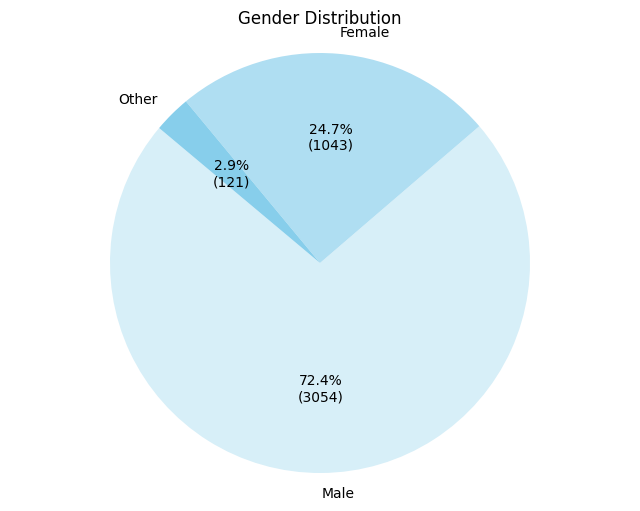

In [20]:
gender_counts = df_main['Gender'].value_counts()
gender_percentages = gender_counts / gender_counts.sum() * 100

# Function to generate gradient colors
def generate_gradient_colors(base_color, n):
    base = mcolors.ColorConverter().to_rgb(base_color)
    gradient = [mcolors.to_hex((base[0] * (1 - i / n) + 1 * (i / n),
                                base[1] * (1 - i / n) + 1 * (i / n),
                                base[2] * (1 - i / n) + 1 * (i / n))) for i in range(n)]
    return gradient[::-1]

# Define base color and generate gradient colors
base_color = 'skyblue'
colors = generate_gradient_colors(base_color, len(gender_counts))

# Function to show both percentage and actual values
def autopct(pct):
    total = sum(gender_counts)
    val = int(round(pct * total / 100.0))
    return f'{pct:.1f}%\n({val})'

# Use gender names as labels
labels = gender_counts.index.tolist()

plt.figure(figsize=(8, 6))
plt.pie(gender_counts,
        labels=labels,
        autopct=autopct,
        startangle=140,
        colors=colors)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

As we see more male than female in the sample, ~3% of respondents couldn't assign them to classical gender definition or did not want to disclose it.

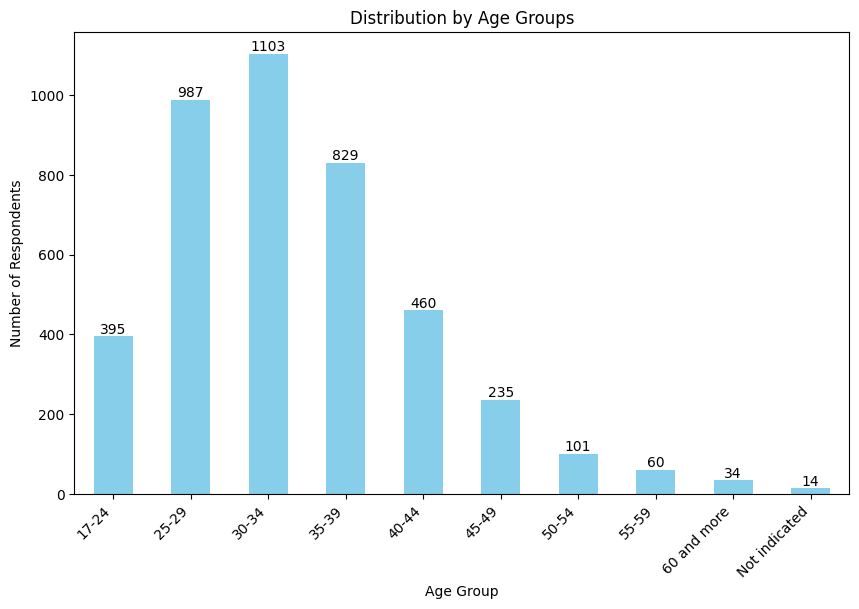

In [21]:
# Define the custom sorting order for the age groups
age_group_order = [
    "17-24", "25-29", "30-34", "35-39", "40-44", "45-49",
    "50-54", "55-59", "60 and more", "Not indicated"]

# Convert Age_group to a categorical type with the specified order
df_main['Age_group'] = pd.Categorical(df_main['Age_group'],
                                      categories=age_group_order,
                                      ordered=True)

age_group_counts = df_main['Age_group'].value_counts().reindex(age_group_order)

plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.title('Distribution by Age Groups')
plt.xticks(rotation=45, ha='right')

# Annotate the bars with counts
for i, count in enumerate(age_group_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

The most abundant age group was from 30 to 34 years old, and the majority of the respondents were in the range from 25 to 45 years old.

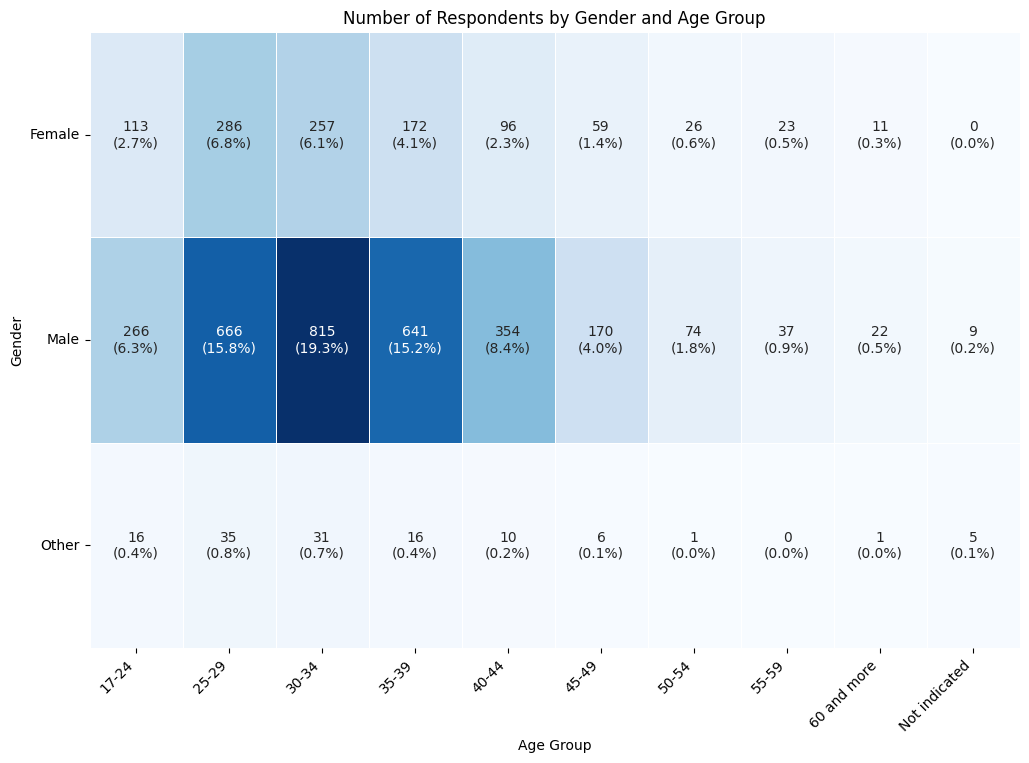

In [22]:
crosstab = pd.crosstab(df_main['Gender'],
                       df_main['Age_group'],
                       margins=True, margins_name="Total")

total_count = crosstab.loc['Total', 'Total']
percentage_crosstab = crosstab.apply(lambda x: (x / total_count) * 100).round(1)

# Combine counts and percentages into one table for annotation
annot = crosstab.astype(str) + "\n(" + percentage_crosstab.astype(str) + "%)"

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab.iloc[:-1, :-1],
            annot=annot.iloc[:-1, :-1],
            fmt='', cmap="Blues", cbar=False, linewidths=.5)

plt.title('Number of Respondents by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Gender')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

As we see male respondents were dominant in each age group. For Male respondents Age group of 30-34 years was the most abundant, for Female and the Other gender respondents age group of 25-29 was the most abundant.

In [23]:
filtered = df_main[df_main['Country'] != 'Not indicated']

N_countries = filtered['Country'].nunique()

print(f"The respondents were from {N_countries} different countries.")

The respondents were from 79 different countries.


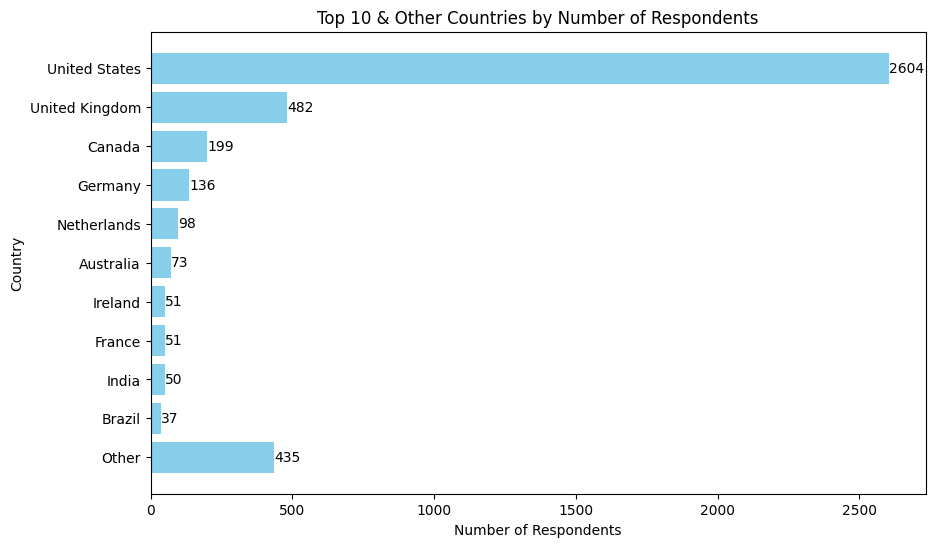

In [24]:
filtered = df_main[df_main['Country'] != 'Not indicated']

country_counts = filtered['Country'].value_counts()

# Separate top 10 and other countries
top_10_countries = country_counts.nlargest(10)
other_countries_count = country_counts.iloc[10:].sum()

# Add the 'Other' category
top_10_countries['Other'] = other_countries_count

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_countries.index,
                top_10_countries.values, color='skyblue')

# Add the number of respondents as labels on the bars
for bar in bars:
    plt.text(bar.get_width(),
             bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width())}',
             va='center')


plt.xlabel('Number of Respondents')
plt.ylabel('Country')
plt.title('Top 10 & Other Countries by Number of Respondents')
plt.gca().invert_yaxis()
# Invert y-axis to have the highest count at the top

plt.show()

In the sample, the majority of the respondents was from the United States, the first three countries by the number of respondents were English speaking countries.

In [25]:
filtered = df_main[df_main['Country'] == 'United States']

state_counts = filtered['State'].value_counts()

total_us_respondents = state_counts.sum()

state_percentages = (state_counts / total_us_respondents) * 100

state_percentages = state_percentages.round(2)

# Combine counts and percentages into a DataFrame
state_data = pd.DataFrame({
    'Count': state_counts,
    'Percentage': state_percentages
})

state_data = state_data.sort_values(by='Count', ascending=False)

state_data

,Count,Percentage
State,,
California,382,14.67
Illinois,222,8.53
Washington,168,6.45
New York,145,5.57
Tennessee,121,4.65
Texas,119,4.57
Ohio,109,4.19
Michigan,108,4.15
Minnesota,101,3.88


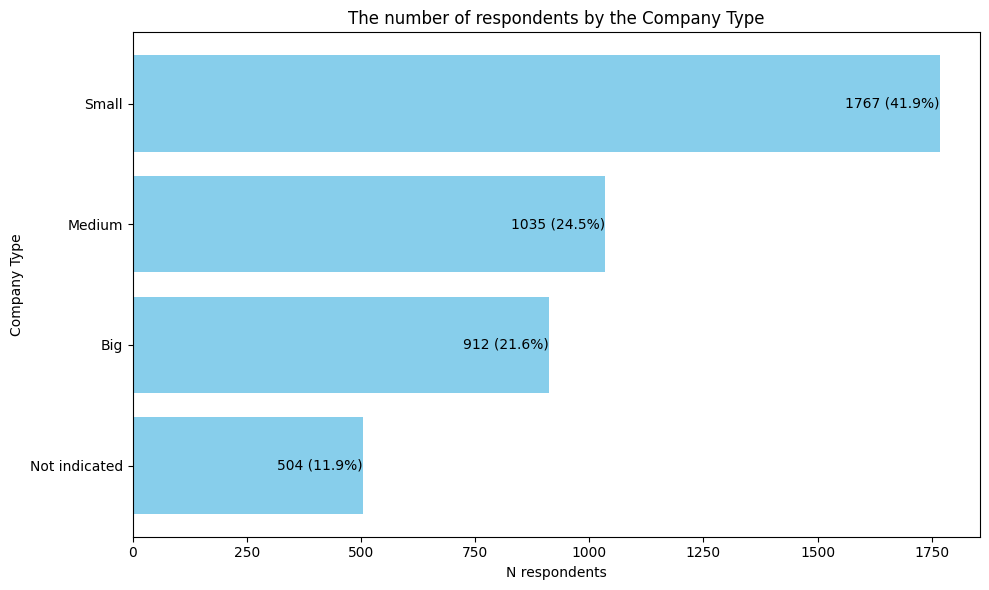

In [26]:
company_type_counts = df_main['Company_type'].value_counts()

total_responses = company_type_counts.sum()
percentages = (company_type_counts / total_responses) * 100
percentages = percentages.round(1)

plt.figure(figsize=(10, 6))
bars = plt.barh(company_type_counts.index,
                company_type_counts, color='skyblue')

# Add labels with counts and percentages on the bars
for bar, count, percentage in zip(bars, company_type_counts, percentages):
    plt.text(bar.get_width() - 0.3,
             bar.get_y() + bar.get_height()/2,
             f'{count} ({percentage}%)',
             va='center', ha='right', color='black')

plt.xlabel('N respondents')
plt.ylabel('Company Type')
plt.title('The number of respondents by the Company Type')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

The majority of the respondents was from the companies which have less than 100 employees.

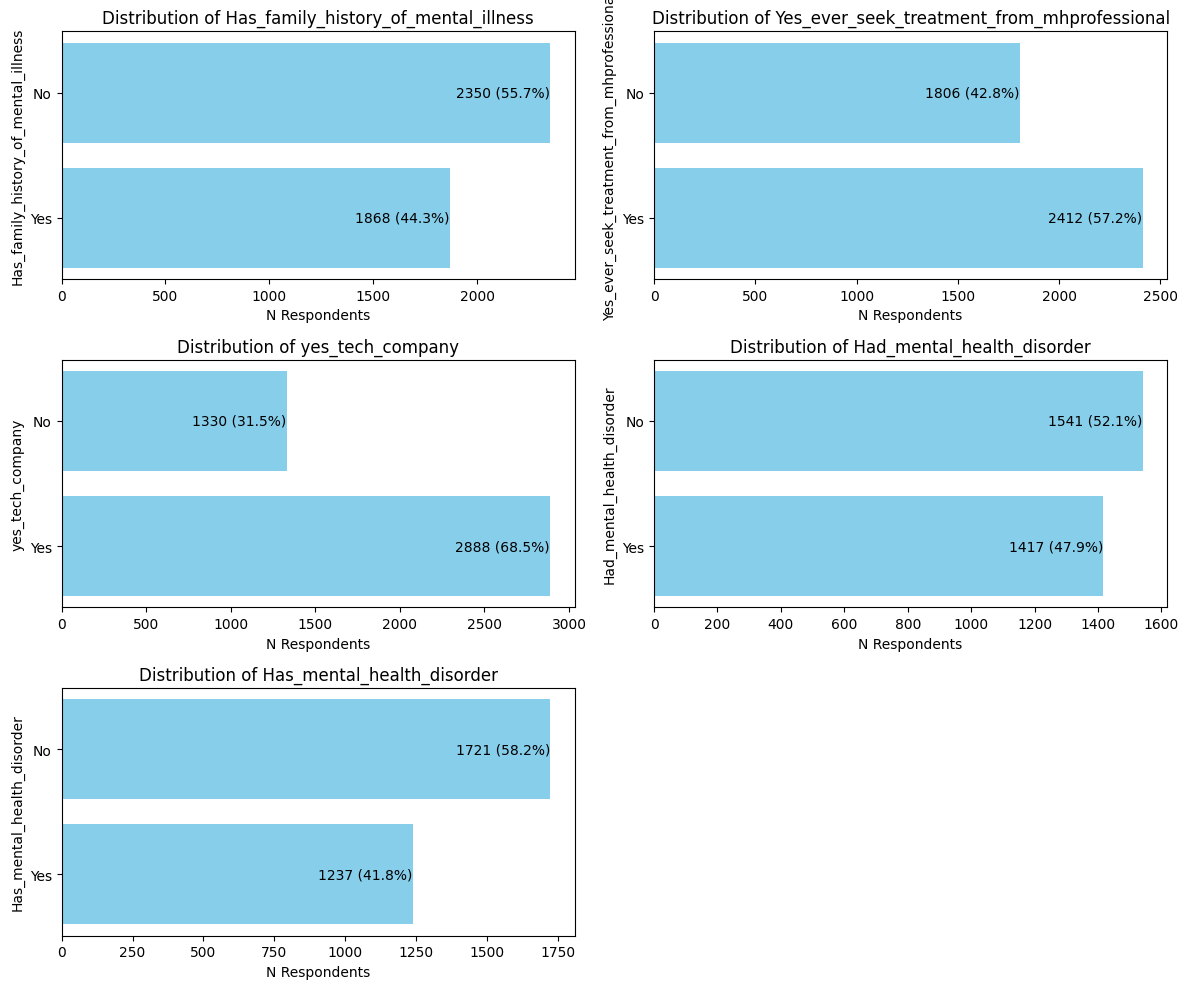

In [27]:
columns_to_plot = [
    'Has_family_history_of_mental_illness',
    'Yes_ever_seek_treatment_from_mhprofessional',
    'yes_tech_company',
    'Had_mental_health_disorder',
    'Has_mental_health_disorder'
]

# Plot each column in a loop
plt.figure(figsize=(12, 10))

for i, column in enumerate(columns_to_plot, 1):
    value_counts = df_main[column].value_counts()

    # Calculate percentages
    total_responses = value_counts.sum()
    percentages = (value_counts / total_responses) * 100
    percentages = percentages.round(1)

    plt.subplot(3, 2, i)
    bars = plt.barh([0, 1],
     [value_counts.get(0, 0),
      value_counts.get(1, 0)],
                    color='skyblue')  # Explicitly set the values for 0 and 1

    # Add labels with counts and percentages directly on the bars
    for bar, count, percentage in zip(bars, [value_counts.get(0, 0),
                                             value_counts.get(1, 0)],
                                              [percentages.get(0, 0),
                                               percentages.get(1, 0)]):
        plt.text(bar.get_width() - 0.2,
                 bar.get_y() + bar.get_height()/2,
                 f'{count} ({percentage}%)',
                 va='center', ha='right', color='black')

    plt.xlabel('N Respondents')
    plt.ylabel(column)
    plt.title(f'Distribution of {column}')
    plt.yticks([0, 1], ['No', 'Yes'])  # Set y-axis ticks and labels
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

44% of respondents indicated that they had family history of mental illness, and 57% of respondents were looking for treatment from a mental health professional in the past. In 2016 - 2019 year surveys, 48% of respondents indicated that had in the past mental health disorder, 42% of respondents had mental health disorder in the moment of filling questionnaire.  
</b>

68% of respondents indicated that their employer primarily a tech company.

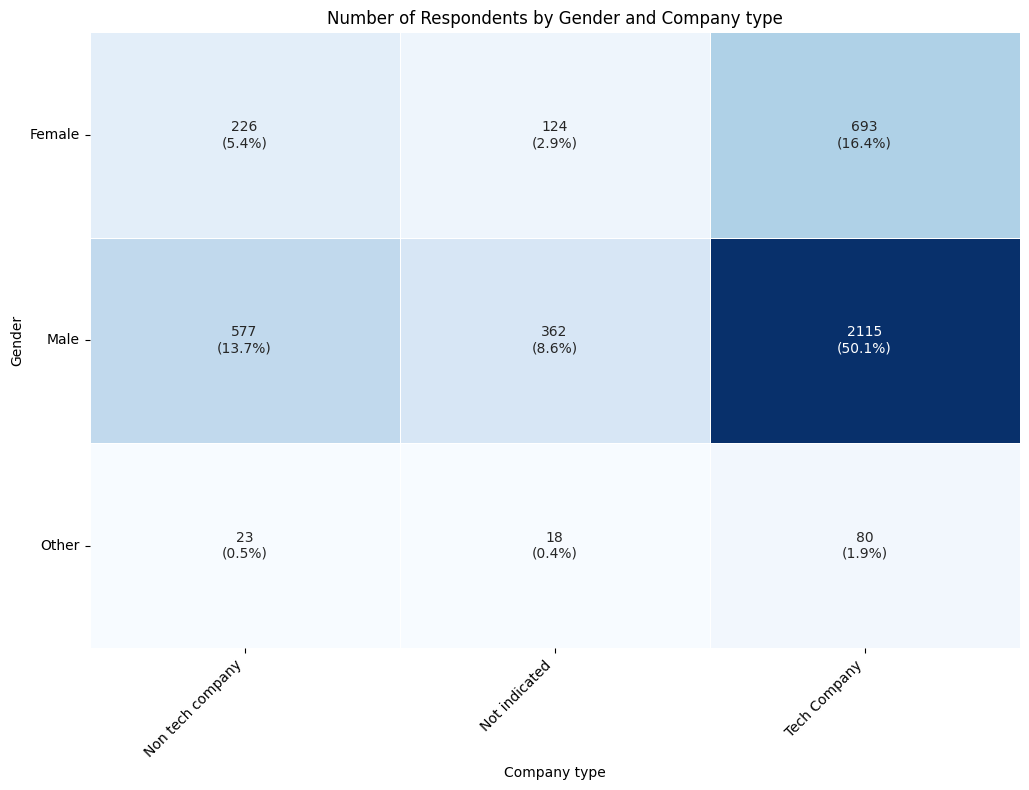

In [28]:
crosstab = pd.crosstab(
    df_main['Gender'], df_main['In_primarily_tech_company'],
    margins=True, margins_name="Total")

total_count = crosstab.loc['Total', 'Total']
percentage_crosstab = crosstab.apply(lambda x: (x / total_count) * 100).round(1)

# Combine counts and percentages into one table for annotation
annot = crosstab.astype(str) + "\n(" + percentage_crosstab.astype(str) + "%)"


plt.figure(figsize=(12, 8))
sns.heatmap(crosstab.iloc[:-1, :-1],
            annot=annot.iloc[:-1, :-1],
            fmt='', cmap="Blues", cbar=False, linewidths=.5)

plt.title('Number of Respondents by Gender and Company type')
plt.xlabel('Company type')
plt.ylabel('Gender')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

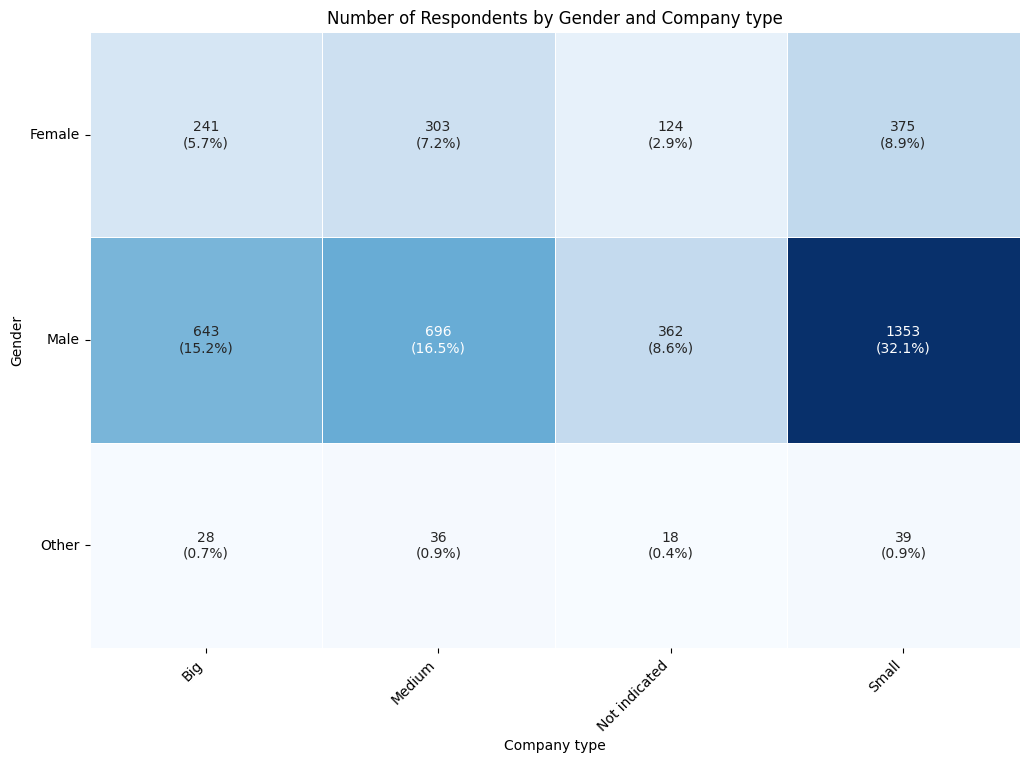

In [29]:
crosstab = pd.crosstab(
    df_main['Gender'], df_main['Company_type'], margins=True,
    margins_name="Total")

total_count = crosstab.loc['Total', 'Total']
percentage_crosstab = crosstab.apply(lambda x: (x / total_count) * 100).round(1)

annot = crosstab.astype(str) + "\n(" + percentage_crosstab.astype(str) + "%)"

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab.iloc[:-1, :-1], annot=annot.iloc[:-1, :-1], fmt='',
            cmap="Blues", cbar=False, linewidths=.5)

plt.title('Number of Respondents by Gender and Company type')
plt.xlabel('Company type')
plt.ylabel('Gender')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

50% of the sample were males working in primarily tech companies. And 32% of respondents indicated that the company they work in is small (less than 100 employees).

In [30]:
crosstab = pd.crosstab(df_main['Gender'],
                       df_main['Has_family_history_of_mental_illness'],
                       margins=True, margins_name="Total")

crosstab

Has_family_history_of_mental_illness,0,1,Total
Gender,,,
Female,443,600,1043
Male,1866,1188,3054
Other,41,80,121
Total,2350,1868,4218


The majority of female and the other gender respondents indicated that they had family history of mental illness.

In [31]:
crosstab = pd.crosstab(df_main['Gender'],
                       df_main['Yes_ever_seek_treatment_from_mhprofessional'],
                       margins=True, margins_name="Total")

crosstab

Yes_ever_seek_treatment_from_mhprofessional,0,1,Total
Gender,,,
Female,279,764,1043
Male,1498,1556,3054
Other,29,92,121
Total,1806,2412,4218


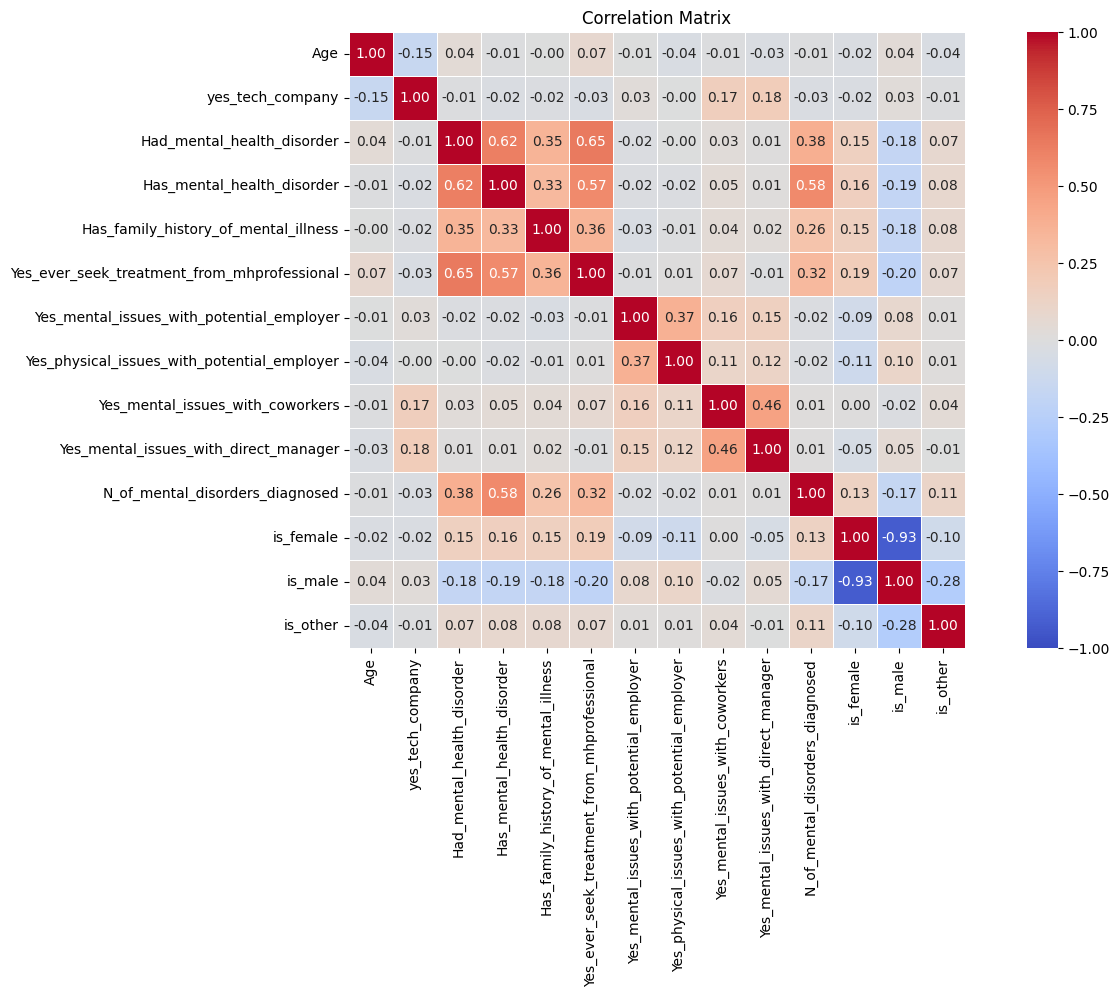

In [32]:
df_main['is_female'] = np.where(df_main['Gender'] == 'Female', 1, 0)
df_main['is_male'] = np.where(df_main['Gender'] == 'Male', 1, 0)
df_main['is_other'] = np.where(df_main['Gender'] == 'Other', 1, 0)


columns_of_interest = [
    'Age',
    'yes_tech_company',
    'Had_mental_health_disorder',
    'Has_mental_health_disorder',
    'Has_family_history_of_mental_illness',
    'Yes_ever_seek_treatment_from_mhprofessional',
    'Yes_mental_issues_with_potential_employer',
    'Yes_physical_issues_with_potential_employer',
    'Yes_mental_issues_with_coworkers',
    'Yes_mental_issues_with_direct_manager',
    'N_of_mental_disorders_diagnosed',
    'is_female',
    'is_male',
    'is_other'
]

df_selected = df_main[columns_of_interest]

correlations = df_selected.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(
    correlations,
    annot=True,
    cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, fmt='.2f',
            annot_kws={"size": 10}, linewidths=.5)
plt.title('Correlation Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()


# Openess to talk about mental diseases in different contexts


## Openess to talk about mental vs physical health with the potential employer
</br>

Testing the assumptions that:
</br>

*   People are willing to bring up physical health issue while talking with the potential employer more often than mental health issue.
</br>
*  Women or other gender will bring up mental health issue less often than men while talking with the potential employer.
</br>


In [33]:
total_respondents = len(df_main)

percent_mental_issues = (
    df_main['Yes_mental_issues_with_potential_employer'].sum()
    / total_respondents
) * 100

percent_physical_issues = (
    df_main['Yes_physical_issues_with_potential_employer'].sum()
    / total_respondents
) * 100

# Calculate confidence intervals for proportions
alpha = 0.05  # 95% confidence level

# Function to calculate CI for proportion using Wilson score method
def calculate_ci_proportion(count, n, alpha=0.05):
    lower_ci, upper_ci = proportion_confint(count, n,
                                            alpha=alpha, method='wilson')
    return lower_ci * 100, upper_ci * 100

# Calculate confidence intervals
ci_lower_mental, ci_upper_mental = calculate_ci_proportion(
    df_main['Yes_mental_issues_with_potential_employer'].sum(),
    total_respondents, alpha
)

ci_lower_physical, ci_upper_physical = calculate_ci_proportion(
    df_main['Yes_physical_issues_with_potential_employer'].sum(),
    total_respondents, alpha
)

# Create a DF to display the results
data = {
    'Total Respondents': [total_respondents],
    'Percent Mental Issues with potential employer': [percent_mental_issues],
    'CI lower Mental Issues': [ci_lower_mental],
    'CI upper Mental Issues': [ci_upper_mental],
    'Percent Physical Issues with potential employer': [percent_physical_issues],
    'CI lower Physical Issues': [ci_lower_physical],
    'CI upper Physical Issues': [ci_upper_physical]
}

df_results = pd.DataFrame(data)

df_results

,Total Respondents,Percent Mental Issues with potential employer,CI lower Mental Issues,CI upper Mental Issues,Percent Physical Issues with potential employer,CI lower Physical Issues,CI upper Physical Issues
0,4218,5.476529,4.829538,6.204545,21.360835,20.150314,22.623473


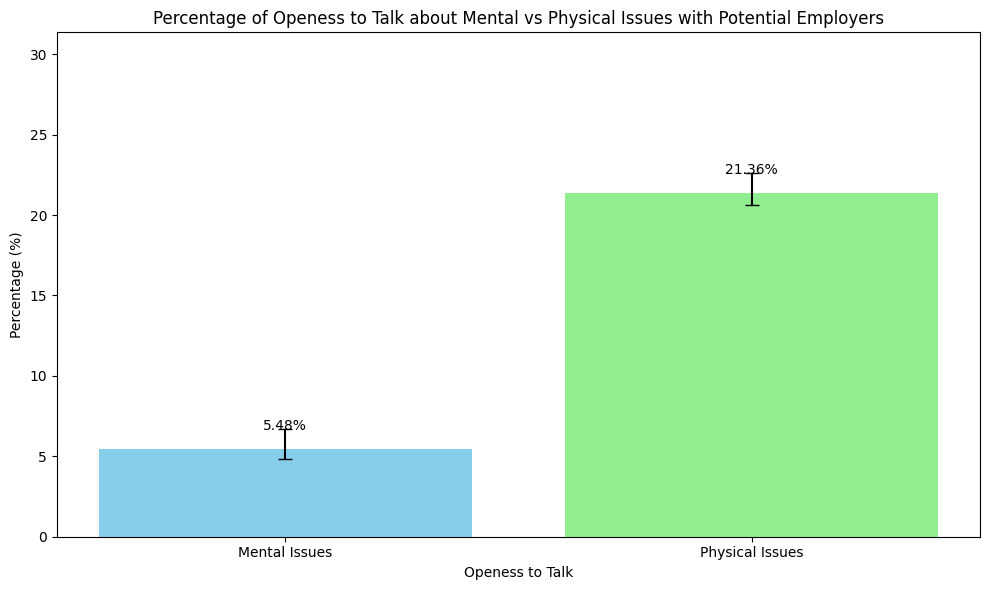

In [34]:
plt.figure(figsize=(10, 6))

labels = ['Mental Issues', 'Physical Issues']
percentages = [percent_mental_issues, percent_physical_issues]
ci_lowers = [ci_lower_mental, ci_lower_physical]
ci_uppers = [ci_upper_mental, ci_upper_physical]

bars = plt.bar(
    labels, percentages,
    yerr=[(percent - lower, upper - percent) for percent,
          lower, upper in zip(percentages, ci_lowers, ci_uppers)],
    capsize=5, color=['skyblue', 'lightgreen']
)

# Add labels with percentages
for bar, percentage, lower, upper in zip(bars,
                                         percentages,
                                         ci_lowers,
                                         ci_uppers):
    plt.text(
        bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
        f'{percentage:.2f}%', ha='center', va='bottom'
    )

plt.xlabel('Openess to Talk')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Openess to Talk about '
          'Mental vs Physical Issues with '
          'Potential Employers')
plt.ylim(0, max(percentages) + 10)

plt.tight_layout()
plt.show()

In [35]:
# Perform a two-proportion z-test
count_mental = df_main['Yes_mental_issues_with_potential_employer'].sum()
count_physical = df_main['Yes_physical_issues_with_potential_employer'].sum()

counts = [count_mental, count_physical]
nobs = [total_respondents, total_respondents]

z_stat, pval = proportions_ztest(counts, nobs)


print('Comparing Openess to talk about Mental Issues with '
'potential employer and Openess to talk about Physical Issues with potential employer:')
print(f'Z-Test Statistic: {z_stat}')
print(f'p-value: {pval}')

# Interpret the results
# H0 there is no difference between physical health
# and mental health disclosure for the potential employer
# H1 there is a difference between physical health
# and mental health disclosure for the potential employer
alpha = 0.05
if pval < alpha:
    print(f'There is a significant difference in percentages (reject H0)')
else:
    print(f'There is no significant difference in percentages (fail to reject H0)')

Comparing Openess to talk about Mental Issues with potential employer and Openess to talk about Physical Issues with potential employer:
Z-Test Statistic: -21.401267359170582
p-value: 1.3002532595689208e-101
There is a significant difference in percentages (reject H0)


In [36]:
columns_of_interest = [
    'Yes_mental_issues_with_potential_employer',
    'Yes_physical_issues_with_potential_employer'
]

genders = df_main['Gender'].dropna().unique()

results = []

# Loop through each gender and calculate the required metrics
for gender in genders:
    gender_df = df_main[df_main['Gender'] == gender]

    for column in columns_of_interest:
        total_respondents = gender_df[column].count()
        yes_count = gender_df[column].sum()
        percentage_yes = (yes_count / total_respondents) * 100
        ci_lower, ci_upper = proportion_confint(yes_count,
                                                total_respondents,
                                                alpha=0.05,
                                                method='wilson')

        # Append the results to the list
        results.append({
            'Gender': gender,
            'Feature': column,
            'Total Respondents': total_respondents,
            'Yes Count': yes_count,
            'Percentage Yes': percentage_yes,
            '95% CI Lower': ci_lower * 100,
            '95% CI Upper': ci_upper * 100
        })

results_df = pd.DataFrame(results)

results_df

,Gender,Feature,Total Respondents,Yes Count,Percentage Yes,95% CI Lower,95% CI Upper
0,Female,Yes_mental_issues_with_potential_employer,1043,21,2.013423,1.320622,3.058404
1,Female,Yes_physical_issues_with_potential_employer,1043,141,13.518696,11.576978,15.728156
2,Male,Yes_mental_issues_with_potential_employer,3054,201,6.581532,5.755525,7.516630
3,Male,Yes_physical_issues_with_potential_employer,3054,731,23.935822,22.455852,25.481279
4,Other,Yes_mental_issues_with_potential_employer,121,9,7.438017,3.962268,13.533089
5,Other,Yes_physical_issues_with_potential_employer,121,29,23.966942,17.237094,32.298901


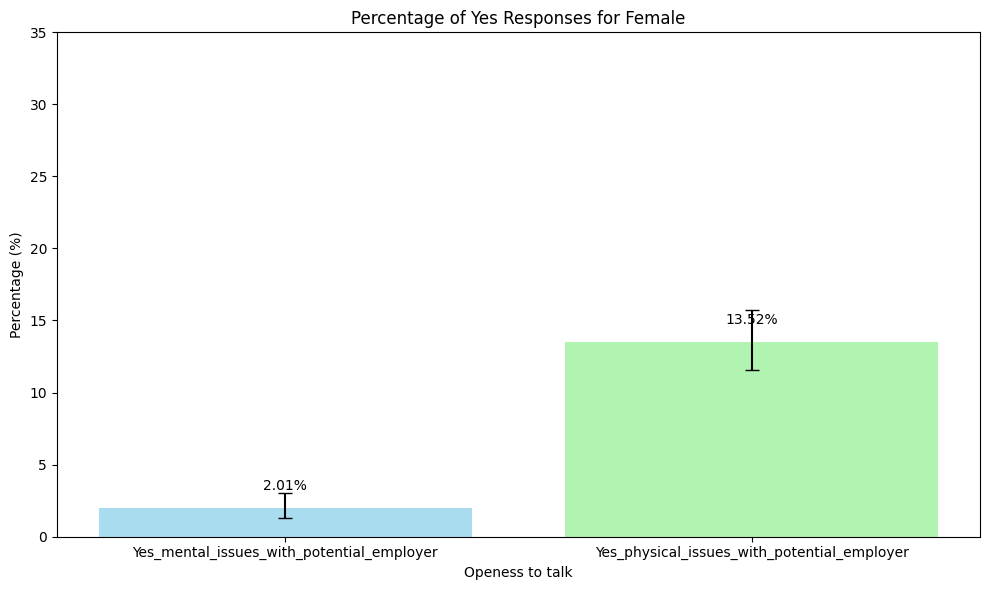

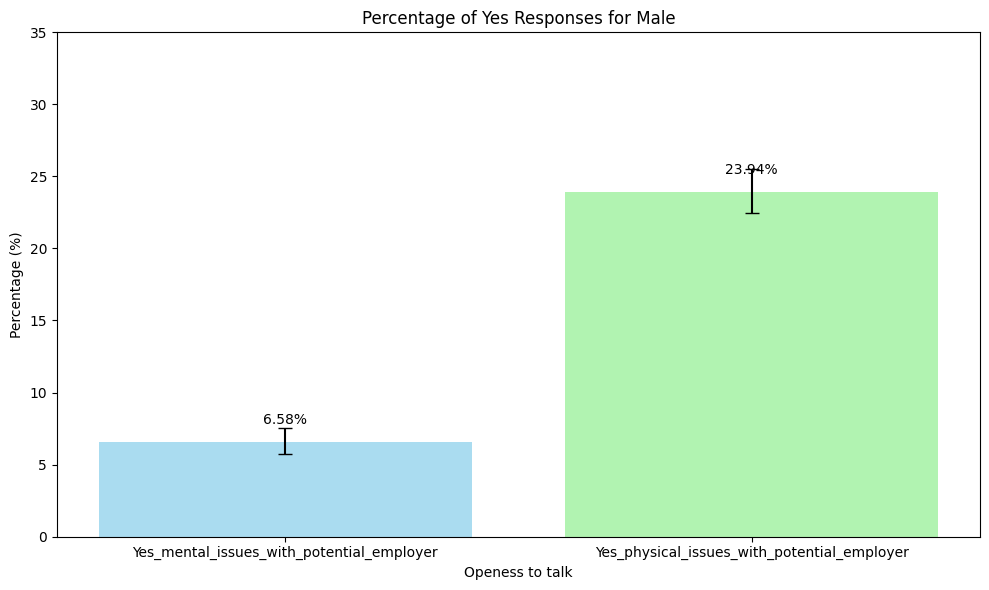

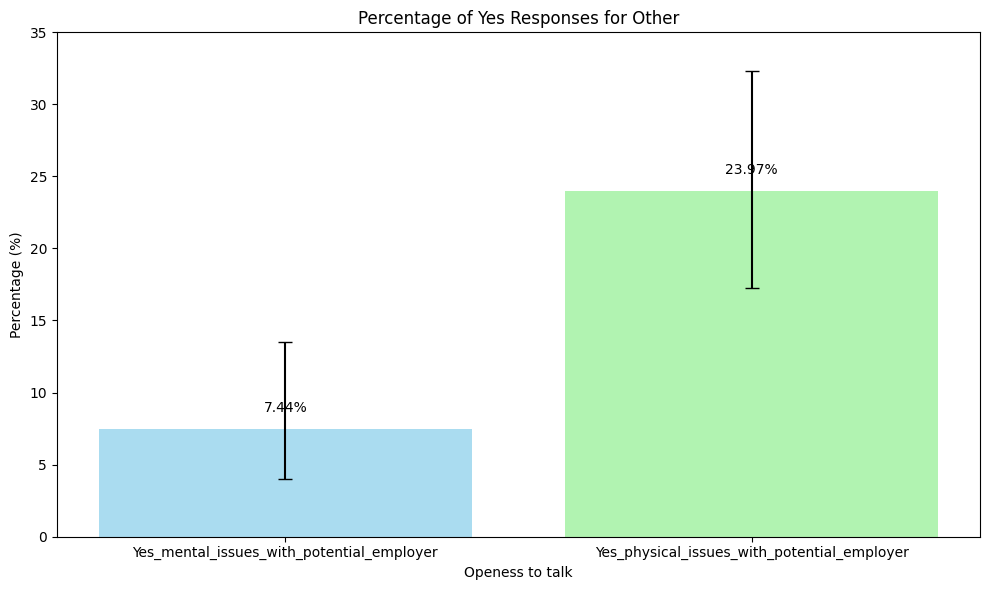

In [37]:
genders = results_df['Gender'].unique()

for gender in genders:
    gender_data = results_df[results_df['Gender'] == gender]

    features = gender_data['Feature']
    percentages = gender_data['Percentage Yes']
    ci_lowers = gender_data['95% CI Lower']
    ci_uppers = gender_data['95% CI Upper']

    plt.figure(figsize=(10, 6))
    bars = plt.bar(features, percentages,
                   yerr=[percentages - ci_lowers, ci_uppers - percentages],
                   capsize=5, color=['skyblue', 'lightgreen'], alpha=0.7)

    # Adding labels with percentages on the bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
                 f'{percentage:.2f}%', ha='center', va='bottom')

    plt.xlabel('Openess to talk')
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage of Yes Responses for {gender}')
    plt.ylim(0, 35)

    plt.tight_layout()
    plt.show()

In [38]:
# Function to perform pairwise comparisons between genders for a given column
def compare_genders(df, column):
    gender_pairs = list(itertools.combinations(genders, 2))

    for (gender1, gender2) in gender_pairs:
        df_gender1 = df[df['Gender'] == gender1]
        df_gender2 = df[df['Gender'] == gender2]

        count1 = df_gender1[column].sum()
        count2 = df_gender2[column].sum()

        nobs1 = df_gender1[column].count()
        nobs2 = df_gender2[column].count()

        count = np.array([count1, count2])
        nobs = np.array([nobs1, nobs2])

        z_stat, pval = proportions_ztest(count, nobs)

        print(f"Comparison between {gender1} and {gender2} for {column}:")
        print(f'Z-Test Statistic: {z_stat}')
        print(f'p-value: {pval}')

        # Interpret the results
        alpha = 0.05
        if pval < alpha:
            print(f'There is a significant difference in percentages '
            '(reject H0)')
        else:
            print(f'There is no significant difference in percentages '
            '(fail to reject H0)')
        print()

# Perform comparisons for each column of interest
for column in columns_of_interest:
    compare_genders(df_main, column)

Comparison between Female and Male for Yes_mental_issues_with_potential_employer:
Z-Test Statistic: -5.626441747441024
p-value: 1.83964871949444e-08
There is a significant difference in percentages (reject H0)

Comparison between Female and Other for Yes_mental_issues_with_potential_employer:
Z-Test Statistic: -3.5646048277354105
p-value: 0.00036440479295874915
There is a significant difference in percentages (reject H0)

Comparison between Male and Other for Yes_mental_issues_with_potential_employer:
Z-Test Statistic: -0.3717888674240237
p-value: 0.7100500530110587
There is no significant difference in percentages (fail to reject H0)

Comparison between Female and Male for Yes_physical_issues_with_potential_employer:
Z-Test Statistic: -7.096340724874655
p-value: 1.2810342616821376e-12
There is a significant difference in percentages (reject H0)

Comparison between Female and Other for Yes_physical_issues_with_potential_employer:
Z-Test Statistic: -3.0806124717066297
p-value: 0.0020657

People were willing to disclose to potential employer physical health issues (21.36% said "Yes") more than mental health issues (only 5.48% said "Yes"). Female respondents were the least willing to disclose mental health issues and physical health issues to the potential employer compare to male and the other gender.


## Comparison of openess to talk about mental health with potential employer, coworkers, and direct manager
</br>


We are testing the asumption that the least people will be willing to talk about mental health issues with the potential employer compare to the coworkers and direct manager.
For women this pattern will be even greater compare to men and other.



In [39]:
columns_of_interest = [
    'Yes_mental_issues_with_potential_employer',
    'Yes_mental_issues_with_coworkers',
    'Yes_mental_issues_with_direct_manager'
]

results = []

# Calculate metrics for each feature
for column in columns_of_interest:
    total_respondents = df_main[column].count()
    yes_count = df_main[column].sum()
    percentage_yes = (yes_count / total_respondents) * 100
    ci_lower, ci_upper = proportion_confint(yes_count,
                                            total_respondents,
                                            alpha=0.05,
                                            method='wilson')

    results.append({
        'Feature': column,
        'Total Respondents': total_respondents,
        'Yes Count': yes_count,
        'Percentage Yes': percentage_yes,
        '95% CI Lower': ci_lower * 100,
        '95% CI Upper': ci_upper * 100
    })

results_df = pd.DataFrame(results)

results_df

,Feature,Total Respondents,Yes Count,Percentage Yes,95% CI Lower,95% CI Upper
0,Yes_mental_issues_with_potential_employer,4218,231,5.476529,4.829538,6.204545
1,Yes_mental_issues_with_coworkers,4218,907,21.503082,20.289448,22.768575
2,Yes_mental_issues_with_direct_manager,4218,1448,34.329066,32.911017,35.775632


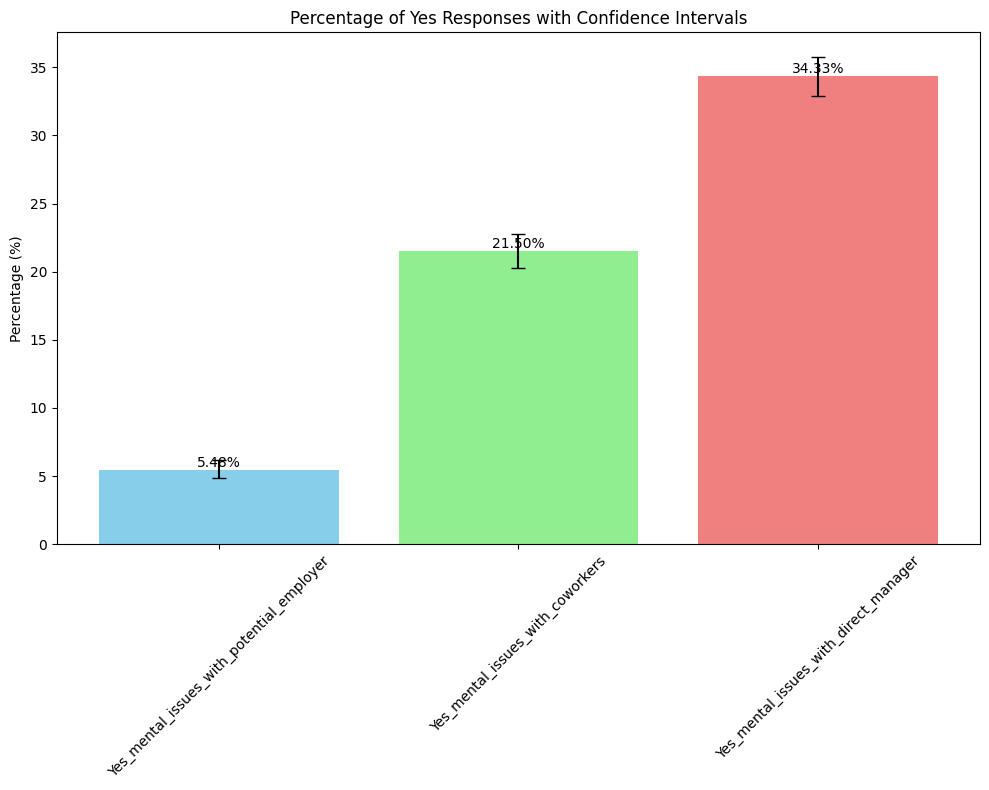

Comparison between Yes_mental_issues_with_potential_employer and Yes_mental_issues_with_coworkers:
Z-Test Statistic: -21.544772915456694
p-value: 5.9273494350871475e-103
There is a significant difference in percentages between Yes_mental_issues_with_potential_employer and Yes_mental_issues_with_coworkers 
-----------------------------------------
Comparison between Yes_mental_issues_with_potential_employer and Yes_mental_issues_with_direct_manager:
Z-Test Statistic: -33.1861258824162
p-value: 1.70694064808344e-241
There is a significant difference in percentages between Yes_mental_issues_with_potential_employer and Yes_mental_issues_with_direct_manager 
-----------------------------------------
Comparison between Yes_mental_issues_with_coworkers and Yes_mental_issues_with_direct_manager:
Z-Test Statistic: -13.130540186478001
p-value: 2.2008097279628395e-39
There is a significant difference in percentages between Yes_mental_issues_with_coworkers and Yes_mental_issues_with_direct_manager

In [40]:
# Plotting the results
plt.figure(figsize=(10, 8))
x = np.arange(len(columns_of_interest))
percentages = results_df['Percentage Yes']
ci_lowers = percentages - results_df['95% CI Lower']
ci_uppers = results_df['95% CI Upper'] - percentages

bars = plt.bar(
    x, percentages, yerr=[ci_lowers, ci_uppers],
    capsize=5, color=['skyblue', 'lightgreen', 'lightcoral']
)
plt.xticks(x, columns_of_interest, rotation=45)
plt.ylabel('Percentage (%)')
plt.title('Percentage of Yes Responses with Confidence Intervals')

# Add labels with percentages on the bars
for bar, percentage in zip(bars, percentages):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height,
        f'{percentage:.2f}%', ha='center', va='bottom'
    )

plt.tight_layout()
plt.show()

# Statistical comparison
for i in range(len(columns_of_interest)):
    for j in range(i + 1, len(columns_of_interest)):
        column1 = columns_of_interest[i]
        column2 = columns_of_interest[j]

        count = np.array([
            results_df.loc[i, 'Yes Count'],
            results_df.loc[j, 'Yes Count']
        ])
        nobs = np.array([
            results_df.loc[i, 'Total Respondents'],
            results_df.loc[j, 'Total Respondents']
        ])

        stat, pval = proportions_ztest(count, nobs)

        print(f'Comparison between {column1} and {column2}:')
        print(f'Z-Test Statistic: {stat}')
        print(f'p-value: {pval}')

        # Interpret the results
        alpha = 0.05
        if pval < alpha:
            print(
                f'There is a significant difference in percentages between '
                f'{column1} and {column2} '
            )
        else:
            print(
                f'There is no significant difference in percentages between '
                f'{column1} and {column2} '
            )
        print('-----------------------------------------')


In [41]:
columns_of_interest = [
    'Yes_mental_issues_with_potential_employer',
    'Yes_mental_issues_with_coworkers',
    'Yes_mental_issues_with_direct_manager'
]

genders = df_main['Gender'].dropna().unique()

results = []

# Loop through each gender and calculate the required metrics
for gender in genders:
    gender_df = df_main[df_main['Gender'] == gender]

    for column in columns_of_interest:
        total_respondents = gender_df[column].count()
        yes_count = gender_df[column].sum()
        percentage_yes = (yes_count / total_respondents) * 100
        ci_lower, ci_upper = proportion_confint(yes_count,
                                                total_respondents,
                                                alpha=0.05,
                                                method='wilson')

        results.append({
            'Gender': gender,
            'Feature': column,
            'Total Respondents': total_respondents,
            'Yes Count': yes_count,
            'Percentage Yes': percentage_yes,
            '95% CI Lower': ci_lower * 100,
            '95% CI Upper': ci_upper * 100
        })

results_df = pd.DataFrame(results)

results_df

,Gender,Feature,Total Respondents,Yes Count,Percentage Yes,95% CI Lower,95% CI Upper
0,Female,Yes_mental_issues_with_potential_employer,1043,21,2.013423,1.320622,3.058404
1,Female,Yes_mental_issues_with_coworkers,1043,227,21.764142,19.365947,24.369564
2,Female,Yes_mental_issues_with_direct_manager,1043,316,30.297220,27.584807,33.154234
3,Male,Yes_mental_issues_with_potential_employer,3054,201,6.581532,5.755525,7.516630
4,Male,Yes_mental_issues_with_coworkers,3054,641,20.988867,19.581477,22.469148
5,Male,Yes_mental_issues_with_direct_manager,3054,1093,35.789129,34.107782,37.506181
6,Other,Yes_mental_issues_with_potential_employer,121,9,7.438017,3.962268,13.533089
7,Other,Yes_mental_issues_with_coworkers,121,39,32.231405,24.561670,40.994645
8,Other,Yes_mental_issues_with_direct_manager,121,39,32.231405,24.561670,40.994645


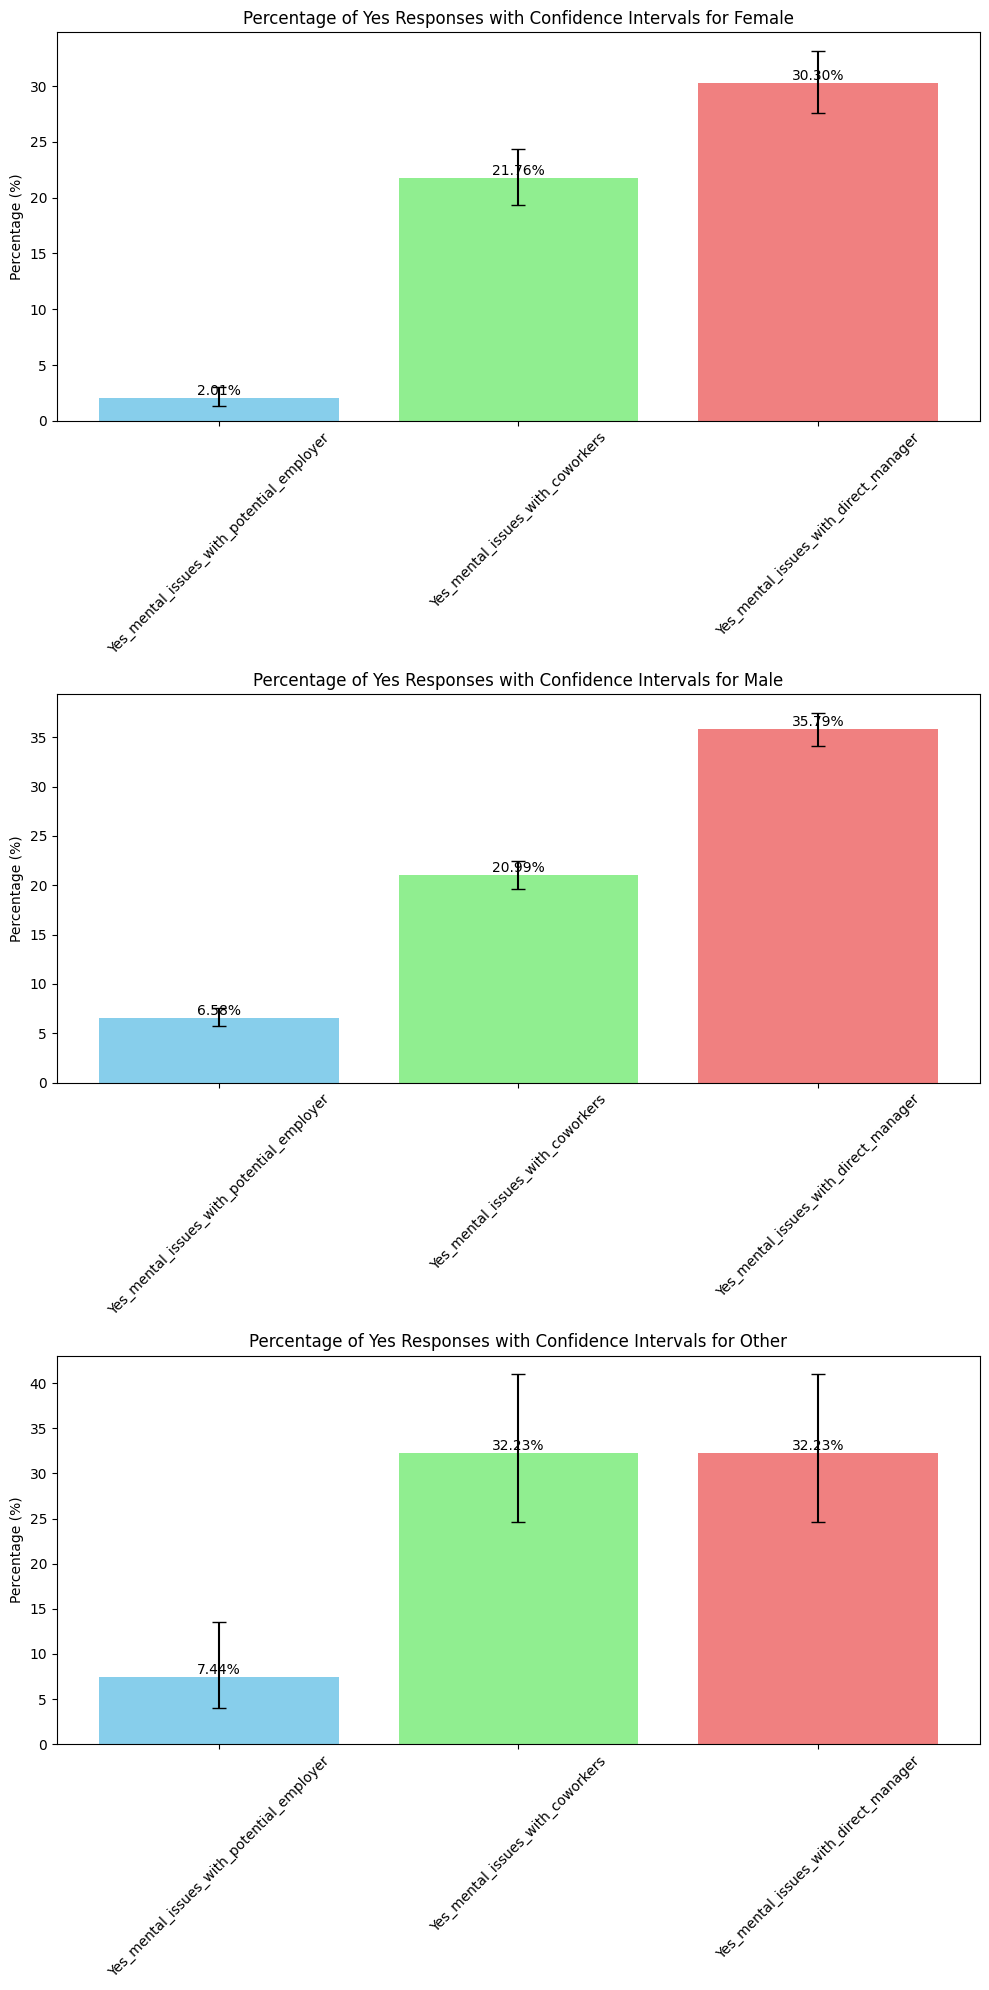

In [42]:
# Plotting the results
plt.figure(figsize=(10, 20))

for i, gender in enumerate(genders, 1):
    gender_results = results_df[results_df['Gender'] == gender]

    x = np.arange(len(columns_of_interest))
    percentages = gender_results['Percentage Yes']
    ci_lowers = percentages - gender_results['95% CI Lower']
    ci_uppers = gender_results['95% CI Upper'] - percentages

    plt.subplot(len(genders), 1, i)
    bars = plt.bar(x, percentages, yerr=[ci_lowers, ci_uppers],
                   capsize=5, color=['skyblue', 'lightgreen', 'lightcoral'])
    plt.xticks(x, columns_of_interest, rotation=45)
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage of Yes Responses with Confidence Intervals for {gender}')

    # Add labels with percentages on the bars
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{percentage:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [43]:
#Function defines how to perform z-tests
def perform_z_tests(df, columns_of_interest):
    z_test_results = []
    gender_pairs = [(g1, g2) for idx, g1 in enumerate(genders)
                    for g2 in genders[idx + 1:]]

    for column in columns_of_interest:
        for g1, g2 in gender_pairs:
            data_g1 = df[(df['Gender'] == g1) & (df['Feature'] == column)]
            data_g2 = df[(df['Gender'] == g2) & (df['Feature'] == column)]

            count = np.array([
                data_g1['Yes Count'].values[0],
                data_g2['Yes Count'].values[0]
            ])
            nobs = np.array([
                data_g1['Total Respondents'].values[0],
                data_g2['Total Respondents'].values[0]
            ])
            stat, pval = proportions_ztest(count, nobs)

            z_test_results.append({
                'Feature': column,
                'Gender 1': g1,
                'Gender 2': g2,
                'z-statistic': stat,
                'p-value': pval,
                'Significant': pval < 0.05
            })

    return pd.DataFrame(z_test_results)

z_test_results_df = perform_z_tests(results_df, columns_of_interest)

print("Z-Test Results:")
print(z_test_results_df)
print("\n")

# Interpretation of z-test results
for index, row in z_test_results_df.iterrows():
    print(f"Comparing {row['Gender 1']} and {row['Gender 2']} for {row['Feature']}:")
    print(f"  Z-Test Statistic: {row['z-statistic']}")
    print(f"  p-value: {row['p-value']}")

    # Hypothesis testing
    if row['p-value'] < 0.05:
        print(f"  There is a significant difference in percentages between "
              f"{row['Gender 1']} and {row['Gender 2']} ")
    else:
        print(f"  There is no significant difference in percentages between "
              f"{row['Gender 1']} and {row['Gender 2']} ")
    print("\n")


Z-Test Results:
                                     Feature Gender 1 Gender 2  z-statistic  \
0  Yes_mental_issues_with_potential_employer   Female     Male    -5.626442   
1  Yes_mental_issues_with_potential_employer   Female    Other    -3.564605   
2  Yes_mental_issues_with_potential_employer     Male    Other    -0.371789   
3           Yes_mental_issues_with_coworkers   Female     Male     0.529019   
4           Yes_mental_issues_with_coworkers   Female    Other    -2.595766   
5           Yes_mental_issues_with_coworkers     Male    Other    -2.956471   
6      Yes_mental_issues_with_direct_manager   Female     Male    -3.223761   
7      Yes_mental_issues_with_direct_manager   Female    Other    -0.437443   
8      Yes_mental_issues_with_direct_manager     Male    Other     0.801335   

        p-value  Significant  
0  1.839649e-08         True  
1  3.644048e-04         True  
2  7.100501e-01        False  
3  5.967921e-01        False  
4  9.438041e-03         True  
5  3.11

It was expected that the least people will be willing to talk about mental issues with the potential employer compare to the coworkers and the direct manager, and it was confirmed since only 5,4% of respondents were willing to share mental issues compare to 21% of those willing to share with coworkers and 34% of those willing to share with direct manager.
Female compare to male and the other gender were less willing to talk about mental issues with direct manager and potential employer. Female compare to the other gender were less willing to talk about mental health issues with the coworkers. No differences between female and male for openess with coworkers identified.  


#Prevalence rate of having mental health disorder across the years

To calculate the prevalence rate of having mental health disorder we will use question 33 ("Do you currently have a mental health disorder?") which was asked only in 2016-2019 surveys.

   Year  Total Respondents  Prevalence Rate (%)  CI Lower (%)  CI Upper (%)
0  2016               1433            40.125611     37.617473     42.686547
1  2017                756            42.857143     39.374394     46.412115
2  2018                417            45.803357     41.081327     50.602002
3  2019                352            41.761364     36.725489     46.975118


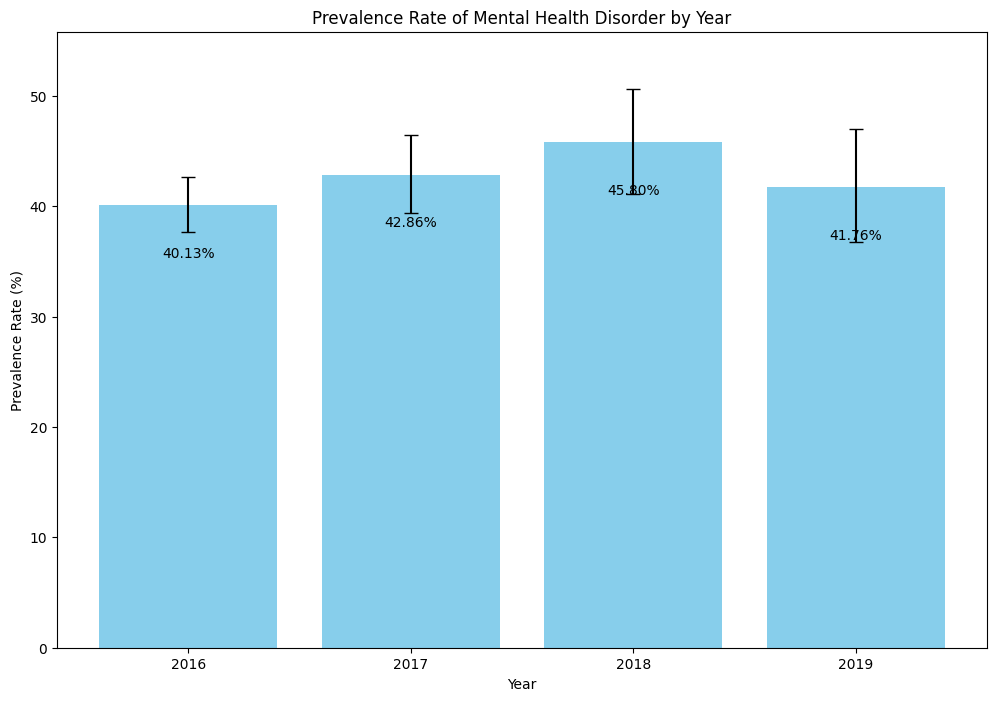

In [44]:
# Filter out rows where 'Has_mental_health_disorder' is NaN
filtered_df = df_main.dropna(subset=['Has_mental_health_disorder'])

# Group by 'SurveyID' (year) and calculate prevalence rates and CI
summary = []

years = filtered_df['SurveyID'].unique()
for year in years:
    year_df = filtered_df[filtered_df['SurveyID'] == year]
    total_respondents = len(year_df)
    disorder_count = year_df['Has_mental_health_disorder'].sum()
    prevalence_rate = (disorder_count / total_respondents) * 100

    # Calculate 95% confidence intervals for the proportion
    ci_lower, ci_upper = proportion_confint(disorder_count,
                                            total_respondents,
                                            alpha=0.05, method='wilson')
    ci_lower_percent = ci_lower * 100
    ci_upper_percent = ci_upper * 100

    summary.append({
        'Year': year,
        'Total Respondents': total_respondents,
        'Prevalence Rate (%)': prevalence_rate,
        'CI Lower (%)': ci_lower_percent,
        'CI Upper (%)': ci_upper_percent
    })

# Convert summary to a DataFrame
summary_df = pd.DataFrame(summary)

print(summary_df)

# Plot the results with confidence intervals
plt.figure(figsize=(12, 8))
bars = plt.bar(summary_df['Year'],
               summary_df['Prevalence Rate (%)'],
        yerr=[summary_df['Prevalence Rate (%)'] - summary_df['CI Lower (%)'],
        summary_df['CI Upper (%)'] - summary_df['Prevalence Rate (%)']],
               capsize=5, color='skyblue')

# Add labels on the bars
for bar, rate in zip(bars, summary_df['Prevalence Rate (%)']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{rate:.2f}%',
             ha='center', va='bottom', color='black')

# Set x-axis ticks to the years
plt.xticks(ticks=summary_df['Year'], labels=summary_df['Year'].astype(int))


plt.xlabel('Year')
plt.ylabel('Prevalence Rate (%)')
plt.title('Prevalence Rate of Mental Health Disorder by Year')
plt.ylim(0, max(summary_df['Prevalence Rate (%)']) + 10)
plt.show()

In [45]:
# H0: There is no difference in prevalence rates across the years
# H1: There is a difference in prevalence rates across the years

# Generate all pairwise combinations of years
year_combinations = list(itertools.combinations(summary_df['Year'], 2))

# Perform pairwise comparisons
alpha = 0.05
for year1, year2 in year_combinations:
    data1 = filtered_df[filtered_df['SurveyID'] == year1]
    data2 = filtered_df[filtered_df['SurveyID'] == year2]

    count1 = data1['Has_mental_health_disorder'].sum()
    count2 = data2['Has_mental_health_disorder'].sum()

    nobs1 = len(data1)
    nobs2 = len(data2)

    count = np.array([count1, count2])
    nobs = np.array([nobs1, nobs2])

    stat, pval = proportions_ztest(count, nobs)

    print(f'Comparing {year1} and {year2}:')
    print(f'Z-Test Statistic: {stat}')
    print(f'p-value: {pval}')

    # Interpret the results
    if pval < alpha:
        print(f'There is a significant difference in prevalence rates between '
              f'{year1} and {year2} ')
    else:
        print(f'There is no significant difference in prevalence rates between '
              f'{year1} and {year2}')
    print('-------------------------------------------------')


Comparing 2016 and 2017:
Z-Test Statistic: -1.2352034759414678
p-value: 0.21675478596106845
There is no significant difference in prevalence rates between 2016 and 2017
-------------------------------------------------
Comparing 2016 and 2018:
Z-Test Statistic: -2.0716862092306725
p-value: 0.03829471427059981
There is a significant difference in prevalence rates between 2016 and 2018 
-------------------------------------------------
Comparing 2016 and 2019:
Z-Test Statistic: -0.5602682852794871
p-value: 0.5752964563166914
There is no significant difference in prevalence rates between 2016 and 2019
-------------------------------------------------
Comparing 2017 and 2018:
Z-Test Statistic: -0.973252944292367
p-value: 0.3304276030738954
There is no significant difference in prevalence rates between 2017 and 2018
-------------------------------------------------
Comparing 2017 and 2019:
Z-Test Statistic: 0.3435144422179522
p-value: 0.7312114777918083
There is no significant difference in

The prevalence rate for the period from 2016 to 2019 ranged in the interval from 40 to 50 %. 2016 year's prevalence rate significantly differed from 2018 year's prevalence rate. In 2018 the prevalence rate of having mental health disorder was the highest (45,80%; 95% CI 41-50.6%).

# Prevalence rate of having at least two mental health diseases in 2016

In our surveys question requesting to indicate concrete mental health conditions respondents have (Question 115: "If yes, what condition(s) have you been diagnosed with?") appeared only in 2016. This question allowed multiple choice options (you could find choice options in the query below), so we could count how many options each respondents have chosen and calculate the proportion of those who chosen more than one option from the total sample size in 2016.

In [46]:
df_answer = pd.read_sql(
  """
SELECT
    SurveyID,
    AnswerText AS `Answers_to_what_condition(s)_have_you_been_diagnosed_with?`,
    COUNT(AnswerText) AS n_times_chosen
FROM
    (SELECT * FROM Answer WHERE questionid = 115)
GROUP BY SurveyID, AnswerText
ORDER BY n_times_chosen DESC;
  """, conn)

df_answer

,SurveyID,Answers_to_what_condition(s)_have_you_been_diagnosed_with?,n_times_chosen
0,2016,-1,865
1,2016,"Mood Disorder (Depression, Bipolar Disorder, etc)",412
2,2016,"Anxiety Disorder (Generalized, Social, Phobia,...",345
3,2016,Attention Deficit Hyperactivity Disorder,121
4,2016,Post-traumatic Stress Disorder,69
5,2016,Obsessive-Compulsive Disorder,45
6,2016,Substance Use Disorder,39
7,2016,Stress Response Syndromes,38
8,2016,Addictive Disorder,35
9,2016,"Personality Disorder (Borderline, Antisocial, ...",35


In [47]:
# Filter the dataframe to include only rows
# where 'N_of_mental_disorders_diagnosed' is not NaN
filtered_df = df_main[~df_main['N_of_mental_disorders_diagnosed'].isna()]

filtered_df_2016 = filtered_df[filtered_df['SurveyID'] == 2016]

# Calculate total number of respondents for the year 2016
total_respondents_2016 = len(filtered_df_2016)

# Calculate number of respondents with more than one disorder
respondents_more_than_one_disorder = (
    filtered_df_2016[filtered_df_2016['N_of_mental_disorders_diagnosed'] > 1]
    .shape[0]
)

# Calculate the percentage of respondents with more than one disorder
percentage_more_than_one_disorder = (
    (respondents_more_than_one_disorder / total_respondents_2016) * 100
)

# Calculate confidence intervals for the proportion
alpha = 0.05  # 95% confidence level
ci_lower, ci_upper = proportion_confint(
    respondents_more_than_one_disorder,
    total_respondents_2016,
    alpha=alpha,
    method='wilson'
)


print(f"Total sample size for 2016: {total_respondents_2016}")
print(f"Number of respondents with more than one disorder: "
      f"{respondents_more_than_one_disorder}")
print(f"Percentage with more than one disorder: "
      f"{percentage_more_than_one_disorder:.2f}%")
print(f"95% Confidence Interval: "
      f"({ci_lower * 100:.2f}%, {ci_upper * 100:.2f}%)")

Total sample size for 2016: 1433
Number of respondents with more than one disorder: 367
Percentage with more than one disorder: 25.61%
95% Confidence Interval: (23.42%, 27.93%)
